In [ ]:
"""
This file analyzes how the evolution of the track width from a rather large 
value to a very small value influences the resonance frequency.

In this code, we do not modify either the short feed distance or the width of the meandered track.
"""

"\nCe fichier analyse comment l'evolutin de la largeur de piste d'une valeur assez \ngrandre a une valuer tres petite influence la frequence de raisonnance\n\nDans ce code, On ne touche Ni a la distance short feed ni a la largeur de la piste meandree\n"

In [ ]:
from backend.utils.ifa_meander_project_v2.geometry import *
from backend.utils.ifa_meander_project_v2.meshing import *
from backend.utils.ifa_meander_project_v2.frequency import *
from backend.utils.ifa_meander_project_v2.simulation import *

In [ ]:
fC      = 868e6  # Center frequency in Hz
delta_f = 4e6    # Frequency step in Hz
print(f"delta_f = {delta_f/1e6:.2f} MHz")
nPoints = 31     # Number of samples

fLow, fHigh, frequencies = calc_frequencies(fC, delta_f, nPoints)
print(f"fLow = {fLow/1e6:.2f} MHz, fHigh = {fHigh/1e6:.2f} MHz, nPoints = {nPoints}")

delta_f = 4.00 MHz
fLow = 808.00 MHz, fHigh = 928.00 MHz, nPoints = 31


In [4]:
mesh_name = "ifa_meander_anlyse_2.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/ifa_meander_anlyse_2.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

In [ ]:
a = 15 / 1000  # Width
b = 30 / 1000  # Height

terminal_a = 50 / 1000
terminal_b = 30 / 1000
x_t = np.array([-terminal_a, 0, 0, -terminal_a])
y_t = np.array([terminal_b, terminal_b, 0, 0])

# Fix the short feed and track width
distance_meandre = 1.5 / 1000     # Value chosen based on the result from analyse_dist_meandre.ipynb
feed          = 15 / 1000         # Value positioned at half of the ground plane
feed_point    = np.array([0, feed, 0])      # Feed at the short feed

In [6]:
largeur_piste_list = np.linspace(0.5 / 1000, 2 * distance_meandre - 0.1 / 1000, 10)
print(f"Min distance: {largeur_piste_list[-1]*1000:.2f} mm")
print(f"Max distance: {largeur_piste_list[0]*1000:.2f} mm")

np.save('data/largeur_piste_list.npy', largeur_piste_list)

Min distance: 2.90 mm
Max distance: 0.50 mm


"""
The meander distance must always be greater than half of the track width
"""
if distance_meandre < largeur_piste / 2:
    raise ValueError(f"Meander distance ({distance_meandre*1000:.2f} mm) must be greater than half of the track width ({largeur_piste*1000/2:.2f} mm)")

if distance_meandre > a - largeur_piste:
    raise ValueError(f"Meander distance ({distance_meandre*1000:.2f} mm) must be less than the plane width minus the track width ({(a-largeur_piste)*1000:.2f} mm)")

In [7]:
def creation_ifa(largeur, hauteur, width, dist_meandre, feed, x_t, y_t, save_mesh_folder, mesh_name, mesh_size=2.25/1000):
    x, y, N, distance_meandre = ifa_creation(largeur, hauteur, width, dist_meandre)
    x_m, y_m = trace_meander(x, y, width)
    feed_wid = width                    # La largeur de la piste est la meme partout
    feed_x = np.array([0, distance_meandre, distance_meandre, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, mesh_size)
    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)
    return N, distance_meandre

In [ ]:
iteration = 1
N_list = []
frequences_resonance = []
for largeur_piste in largeur_piste_list:

    print(f"\nIteration N°{iteration}")
    print(f"Meander distance {distance_meandre * 1000} mm")
    print(f"IFA track width {largeur_piste * 1000} mm")
    N_list_elem, new_distance_meandre_elem = creation_ifa(a, b, largeur_piste, distance_meandre, feed, x_t, y_t, save_mesh_folder, mesh_name)
    print(f"Number of meanders {N_list_elem}")
    print(f"New meander distance {new_distance_meandre_elem * 1000} mm")
    N_list.append(N_list_elem)
    frequence_resonance, *_ = analysis(frequencies, ifa_meander_mat, feed_point)
    frequences_resonance.append(frequence_resonance)

    iteration += 1

np.save(f'data/analyse_largeur_piste/frequences_resonance.npy', frequences_resonance)
np.save(f'data/analyse_largeur_piste/N_list.npy', N_list)


Iteration N°1
distance meandres 1.5 mm
Largeur de piste ifa 0.5 mm
Number of meanders 7
New distance meandres 1.642857142857143 mm
Simulation 1/31 | f = 808.00 MHz | S11 = -1.35 dB
Simulation 2/31 | f = 812.00 MHz | S11 = -1.15 dB
Simulation 3/31 | f = 816.00 MHz | S11 = -1.00 dB
Simulation 4/31 | f = 820.00 MHz | S11 = -0.87 dB
Simulation 5/31 | f = 824.00 MHz | S11 = -0.77 dB
Simulation 6/31 | f = 828.00 MHz | S11 = -0.68 dB
Simulation 7/31 | f = 832.00 MHz | S11 = -0.61 dB
Simulation 8/31 | f = 836.00 MHz | S11 = -0.55 dB
Simulation 9/31 | f = 840.00 MHz | S11 = -0.49 dB
Simulation 10/31 | f = 844.00 MHz | S11 = -0.45 dB
Simulation 11/31 | f = 848.00 MHz | S11 = -0.41 dB
Simulation 12/31 | f = 852.00 MHz | S11 = -0.38 dB
Simulation 13/31 | f = 856.00 MHz | S11 = -0.35 dB
Simulation 14/31 | f = 860.00 MHz | S11 = -0.32 dB
Simulation 15/31 | f = 864.00 MHz | S11 = -0.30 dB
Simulation 16/31 | f = 868.00 MHz | S11 = -0.28 dB
Simulation 17/31 | f = 872.00 MHz | S11 = -0.26 dB
Simulation

In [ ]:
# Load and display largeur_piste_list.npy
loaded_largeur_piste_list = np.load('data/analyse_largeur_piste/largeur_piste_list.npy')
# print("\nContents of loaded_largeur_piste_list.npy:", loaded_largeur_piste_list * 1000)

# Load and display frequences_resonance.npy
loaded_frequences_resonance = np.load('data/analyse_largeur_piste/frequences_resonance.npy')
print("\nContents of frequences_resonance.npy:", loaded_frequences_resonance * 1e-6)

# Load and display N_list.npy
loaded_N_list = np.load('data/analyse_largeur_piste/N_list.npy')
print("\nContents of N_list.npy:", loaded_N_list)


Contenu de frequences_resonance.npy : [808. 856. 928. 928. 928. 928. 928. 928. 928. 928.]

Contenu de N_list.npy : [7 6 5 5 4 4 4 3 3 3]


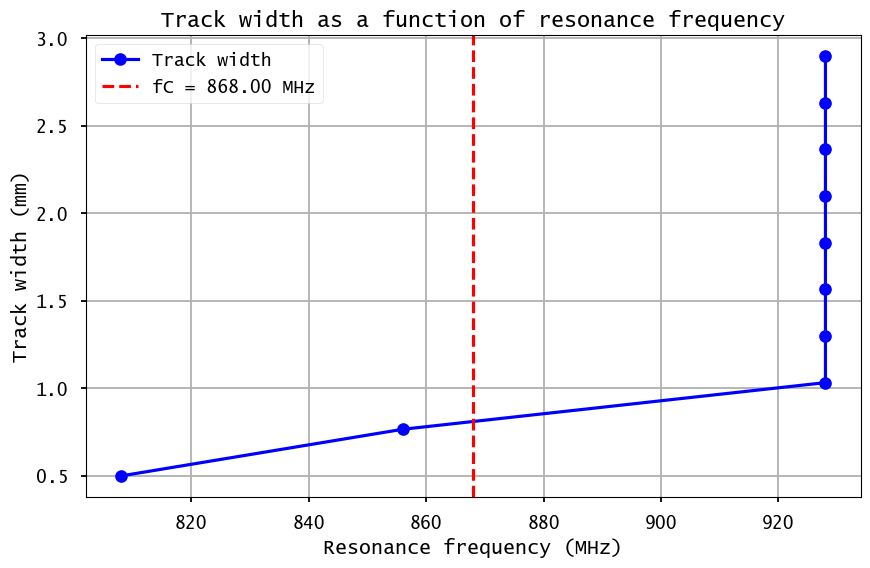

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-talk')
plt.rcParams['font.family'] = 'Lucida Console'
plt.rcParams['font.size'] = 11

# Convert resonance frequencies to MHz
frequences_resonance_mhz = np.array(frequences_resonance) * 1e-6
largeur_piste_mm = np.array(loaded_largeur_piste_list) * 1000  # Convert to mm

# Inverse plot
plt.figure(figsize=(10, 6))
plt.plot(frequences_resonance_mhz, largeur_piste_mm, marker='o', linestyle='-', color='b', label='Track width')

# Add a vertical line for fC
plt.axvline(x=fC * 1e-6, color='r', linestyle='--', label=f'fC = {fC * 1e-6:.2f} MHz')

plt.ylabel('Track width (mm)')
plt.xlabel('Resonance frequency (MHz)')
plt.title('Track width as a function of resonance frequency')
plt.legend()
plt.grid(True)
plt.show()

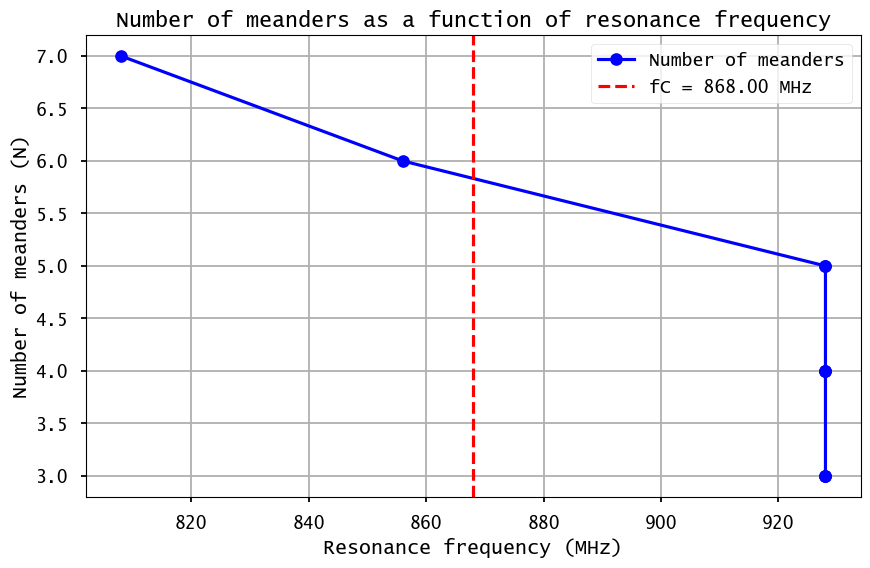

: 

In [ ]:
# Conversion of resonance frequencies to MHz
frequences_resonance_mhz = loaded_frequences_resonance * 1e-6
fC_mhz = fC * 1e-6

plt.figure(figsize=(10, 6))
plt.plot(frequences_resonance_mhz, loaded_N_list, marker='o', linestyle='-', color='b', label='Number of meanders')
plt.axvline(x=fC_mhz, color='r', linestyle='--', label=f'fC = {fC_mhz:.2f} MHz')

# If we have a value at fC_mhz, display it
index_fC = np.where(frequences_resonance_mhz == fC_mhz)[0]
if len(index_fC) > 0:
    N_at_fC = loaded_N_list[index_fC[0]]
    plt.scatter([fC_mhz], [N_at_fC], color='g', label=f'N at fC = {N_at_fC}')

plt.xlabel('Resonance frequency (MHz)')
plt.ylabel('Number of meanders (N)')
plt.title('Number of meanders as a function of resonance frequency')
plt.legend()
plt.grid(True)
plt.show()